In [17]:
import numpy as np
import scipy.sparse as sp
from mpl_toolkits import mplot3d
from cntxt import rom_am
from rom_am import ROM
import matplotlib.pyplot as plt
from heat import FEM

## **Heat Eqaution:**
Heat equation on [0,1] and $$ t \in [0,T]$$
$$ \partial_t u(x,t) -\kappa \Delta u(x,t) = 0$$
where : $$u_x(0,t)=q(t)$$,
$$u_{x}(1,t)=0$$
and $$u_{x}(x,0)=u_{ini}$$

In [18]:
N = 60
Nt = 1000
length = 1
T = 30
dt = T / (Nt - 1)
kappa = 0.2
fea = FEM(N, Nt, length, T, kappa = kappa)
neumann = lambda t : t/T * np.sin(np.pi * 10 * t/T)
t_ini = np.zeros(N+1)
U = fea.solve(t_ini = t_ini, neumann = neumann)

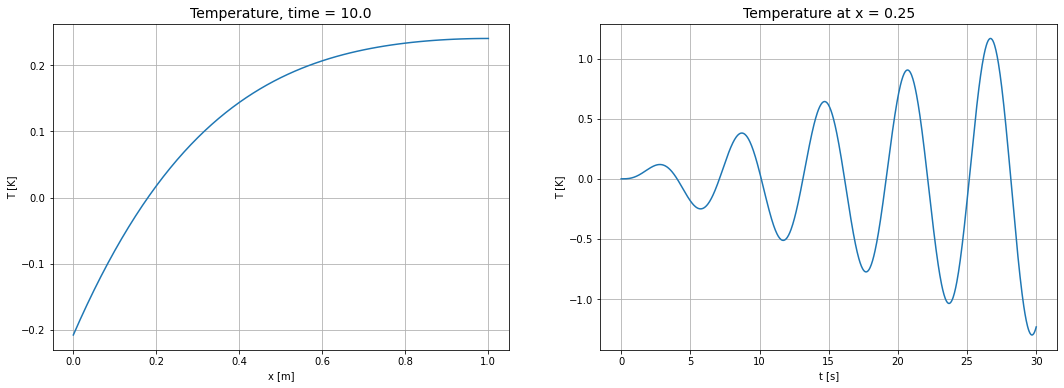

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6)) 
t = int(Nt/3)
x = int(N/4)

ax[0].plot(np.linspace(0, 1, N + 1), U[:, t]);
ax[0].set_title('Temperature, time = {}'.format(t * fea.dt) , fontsize=14);
ax[0].set_ylabel("T [K]");
ax[0].set_xlabel("x [m]");
ax[0].grid()

ax[1].plot(np.linspace(0, T, Nt), U[x, :]);
ax[1].set_title('Temperature at x = {}'.format(x * (length/N)) , fontsize=14);
ax[1].set_ylabel("T [K]");
ax[1].set_xlabel("t [s]");
ax[1].grid()

The above system is described by the following system:
$$ \dot T = - \kappa M^{-1} K T + M^{-1} \begin{pmatrix}
1  \\
0 \\
\vdots \\
0 \\
\end{pmatrix} q(t)$$

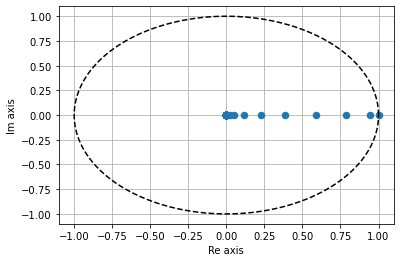

In [20]:
omega, w = np.linalg.eig(-kappa * sp.linalg.inv(fea.M_mat).toarray() @ fea.K_mat.toarray() )
lambd = np.exp(omega * (T/(Nt-1)))
plt.plot(np.real(lambd), np.imag(lambd), '.', markersize = 13);
plt.xlabel("Re axis");
plt.ylabel("Im axis");
theta = np.linspace(0, 2*np.pi, 1024)
plt.plot(np.cos(theta), np.sin(theta), "k--");
plt.grid();

**Loading the snapshot data**

In [21]:
X = U[:, :-1]
Y = U[:, 1::]

Y_input = np.zeros((1, Nt-1))
for i in range(Nt-1):
    Y_input[:, i] = neumann(i * dt)

## DMD with Control:

In [22]:
dmd_c = ROM("dmdc")
dmd_c.decompose(X, Y, Y_input, dt,)

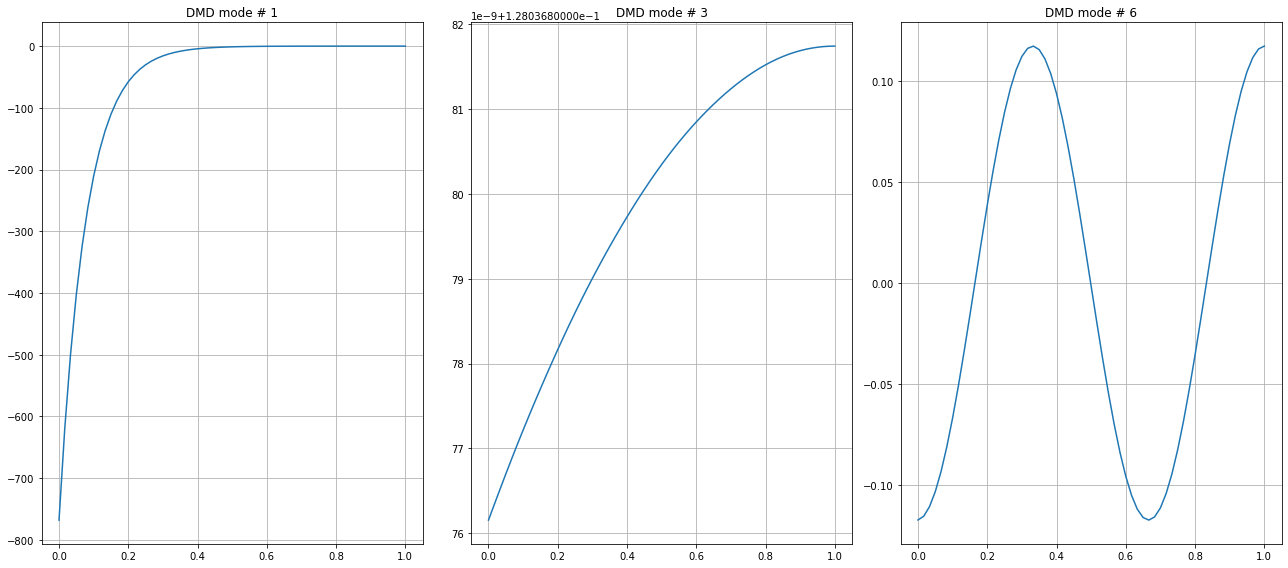

In [23]:
n_mode = [0, 2, 5]

fig, ax  = plt.subplots(1, 3, figsize = (18, 8))

for i in range(len(n_mode)):
    
    modes = np.real(dmd_c.dmd_modes[:, n_mode[i]].copy())
    ax[i].plot(np.linspace(0, 1, N + 1), modes,);
    ax[i].grid();
    ax[i].set_title("DMD mode # {}" .format(n_mode[i]+1));

fig.tight_layout();

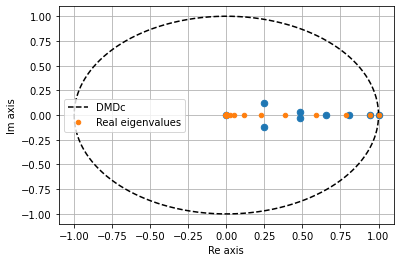

In [25]:
plt.plot(np.real(dmd_c.lambd[1:]), np.imag(dmd_c.lambd[1:]), '.', markersize = 13);
plt.xlabel("Re axis");
plt.ylabel("Im axis");
theta = np.linspace(0, 2*np.pi, 1024)
plt.plot(np.cos(theta), np.sin(theta), "k--", label= "DMDc");
plt.plot(np.real(lambd), np.imag(lambd), '.', markersize = 9, label = "Real eigenvalues");
plt.legend();
plt.grid();

## Comparing with DMD without control

In [16]:
dmd = ROM("dmd")
rank = 15
dmd.decompose(X, Y, dt = dt, rank = rank)

/Users/azzeddinetiba/Documents/PhD/ROM_AM/rom_am/pod.py:39: RuntimeWarning: divide by zero encountered in log
  omega = np.log(lambd) / dt
/Users/azzeddinetiba/Documents/PhD/ROM_AM/rom_am/pod.py:39: RuntimeWarning: invalid value encountered in true_divide
  omega = np.log(lambd) / dt


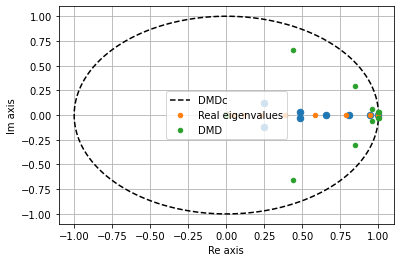

In [15]:
plt.plot(np.real(dmd_c.lambd[1:]), np.imag(dmd_c.lambd[1:]), '.', markersize = 13);
plt.xlabel("Re axis");
plt.ylabel("Im axis");
theta = np.linspace(0, 2*np.pi, 1024)
plt.plot(np.cos(theta), np.sin(theta), "k--", label= "DMDc");
plt.plot(np.real(lambd), np.imag(lambd), '.', markersize = 9, label = "Real eigenvalues");
plt.plot(np.real(dmd.lambd), np.imag(dmd.lambd), '.', markersize = 9, label = "DMD");
plt.legend();
plt.grid();

---